In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.optimizers import SGD
import tensorflow.keras.utils
import tensorflow.keras.backend as K
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from datetime import datetime


#print(K.tensorflow_backend._get_available_gpus())
#print('img data fmt: ', K.image_data_format())

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train.shape = ', X_train.shape, ' y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape, ' y_test.shape = ', y_test.shape)

print('data type: ', type(X_train[0][0][0]))
print('label type: ', type(y_train[0]))

X_train.shape =  (60000, 28, 28)  y_train.shape =  (60000,)
X_test.shape =  (10000, 28, 28)  y_test.shape =  (10000,)
data type:  <class 'numpy.uint8'>
label type:  <class 'numpy.uint8'>


In [3]:
# Reshape data and normalize between [0.0 , 1.0] before feeding it to our model

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
# convert target labels from scalars to an array of binary values
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# convert img data from ints in range [0,255] to floats in range [0,1] 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

print('X_train.shape = ', X_train.shape, ' y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape, ' y_test.shape = ', y_test.shape)

# check the type of the first element in our 4-D array
print('data type: ', type(X_train[0][0][0][0])) 
print('label type: ', type(y_train[0][0]))

X_train.shape =  (60000, 28, 28, 1)  y_train.shape =  (60000, 10)
X_test.shape =  (10000, 28, 28, 1)  y_test.shape =  (10000, 10)
data type:  <class 'numpy.float32'>
label type:  <class 'numpy.float32'>


# MultiLayer Perceptron (MLP)

* 4 fully connected (dense) layers
    * 1 input layer (784,)
    * 2 hidden layers (128,) ReLU
    * 1 output layer (10,) softmax
    
Outputs probability for each class

In [4]:
# create an empty sequential model
model = Sequential()

# add layers
model.add(Flatten(input_shape=(28,28,1))) # outputs (784,) array
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# Stochastic Gradient Descent (SGD) optimizer
sgd = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)

# Compile the model - this is where memory is allocated and a compute graph is generated
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# print out a summary of our model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [5]:
# TensorBoard stuff

log_dir="logs\\fit\\" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [6]:
# if you get a ResourceExhaustedError, decrease the batch_size
hist = model.fit(X_train, y_train, epochs=10, batch_size=128,
                 callbacks=[tensorboard_callback])
# model.fit() returns a history object, which is a dict containing loss and acc metrics (and any other metrics we pass in)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 33s 557us/sample - loss: 0.5216 - accuracy: 0.8474
Epoch 2/10
60000/60000 [==============================] - 31s 520us/sample - loss: 0.1888 - accuracy: 0.9445
Epoch 3/10
60000/60000 [==============================] - 31s 513us/sample - loss: 0.1366 - accuracy: 0.9593
Epoch 4/10
60000/60000 [==============================] - 29s 483us/sample - loss: 0.1075 - accuracy: 0.9679
Epoch 5/10
60000/60000 [==============================] - 29s 490us/sample - loss: 0.0861 - accuracy: 0.9749
Epoch 6/10
60000/60000 [==============================] - 31s 523us/sample - loss: 0.0730 - accuracy: 0.9783
Epoch 7/10
60000/60000 [==============================] - 32s 528us/sample - loss: 0.0635 - accuracy: 0.9811
Epoch 8/10
60000/60000 [==============================] - 28s 471us/sample - loss: 0.0540 - accuracy: 0.9837
Epoch 9/10
60000/60000 [==============================] - 31s 512us/sample - loss: 0.0462 - accuracy: 0.9

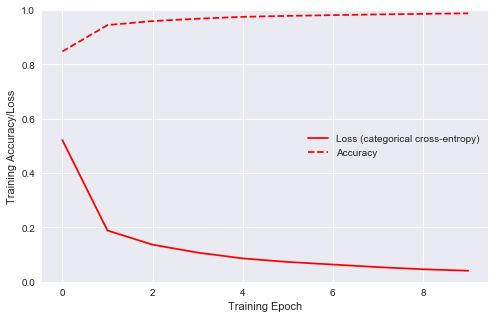

In [8]:
plt.style.use('seaborn')
plt.figure(figsize=(8,5)) # figsize is in inches
# plot the history object returned by the fit() method
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['accuracy'], 'r--')
plt.xlabel('Training Epoch')
plt.ylabel('Training Accuracy/Loss')
plt.legend(['Loss (categorical cross-entropy)', 'Accuracy'])
plt.grid(True)
plt.ylim(0,1)
plt.show()


In [9]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=128)
# works, but text output is bugged? 

In [10]:
print('test loss: ', loss)
print('test accuracy: ', accuracy)

test loss:  0.07671343453207519
test accuracy:  0.977


# Convolutional Neural Net

 * 2 Convolutional Layers
 * 2 Max-Pooling Layers
 * 2 Fully-Connected layers
 
 in $\rightarrow$ Conv2d $\rightarrow$ Max Pooling $\rightarrow$ Conv2d $\rightarrow$ Max Pooling $\rightarrow$ Fully Connected $\rightarrow$ out

In [14]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3),
               activation='relu',
               input_shape= (28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)

cnn.compile(loss=tf.keras.losses.categorical_crossentropy,
            optimizer=sgd,
            metrics=['accuracy'])

cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [16]:
log_dir="logs\\fit\\" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

hist_cnn = cnn.fit(X_train, y_train, batch_size=128, epochs=10, callbacks=[tensorboard_callback])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0721 - accuracy: 0.9775
Epoch 2/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0565 - accuracy: 0.9822
Epoch 3/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0467 - accuracy: 0.9857
Epoch 4/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0387 - accuracy: 0.9880
Epoch 5/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0343 - accuracy: 0.9895
Epoch 6/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0295 - accuracy: 0.9906
Epoch 7/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0267 - accuracy: 0.9915
Epoch 8/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0221 - accuracy: 0.9930
Epoch 9/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0212 - accuracy: 0.9936
Epoch 10/10
60

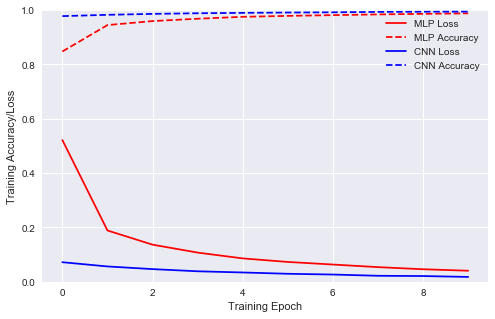

In [17]:
plt.figure(figsize=(8,5))
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['accuracy'], 'r--')
plt.plot(hist_cnn.history['loss'], 'b')
plt.plot(hist_cnn.history['accuracy'], 'b--')
plt.xlabel('Training Epoch')
plt.ylabel('Training Accuracy/Loss')
plt.legend(['MLP Loss', 'MLP Accuracy', 
            'CNN Loss', 'CNN Accuracy'])
plt.grid(True)
plt.ylim(0,1)
plt.savefig('MNIST_cnn_mlp.png', dpi=150, bbox_inches='tight')
plt.show() # if you call plt.savefig() after plt.show(), you'll save a blank figure

In [ ]:
loss, accuracy = cnn.evaluate(X_test, y_test, batch_size=128)

print('test loss: ', loss)
print('test accuracy: ', accuracy)